In [55]:
#here collection if different polotting approaches

#hovering dots:

import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)

%matplotlib qt

x = np.random.rand(15)
y = np.random.rand(15)
names = np.array(list("ABCDEFGHIJKLMNO"))
c = np.random.randint(1,5,size=15)

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

fig,ax = plt.subplots()
sc = plt.scatter(x,y,c=c, s=100, cmap=cmap, norm=norm)

annot = ax.annotate("", xy=(0,0), xytext=(5,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
#xytext - how far from the dot the text is, bbox - box with name inside, arrowprops - to draw arrow

annot.set_visible(False)

def update_annot(ind, name):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos #resets the xy values from annot above
    text = name
    annot.set_text(text) #resets the text from annot above
    
    #annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    #annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind, name="halloo")
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()

In [3]:
# Save interactive plots:
#%matplotlib qt

tit='mags'
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.plot([1,2,3],[10,-10,30])
#Save:
import pickle
f_handle=open('picture_'+tit+'.fig.pickle', 'wb')
pickle.dump(fig, f_handle) # This is for Python 3 - py2 may need `file` instead of `open`
f_handle.close()
plt.close('all')


In [5]:

#Reopen:
%matplotlib qt
figx = pickle.load(open('picture_'+tit+'.fig.pickle', 'rb'))
figx.show() # Show the figure, edit it, etc.!

qt.qpa.drawing: Layer-backing can not be explicitly controlled on 10.14 when built against the 10.14 SDK


In [ ]:
#STATIC BOXPLOT (REMOVED FROM FUNKS COS UGLY)

def boxplot_std_static(std_data, tit='Magnetometers', channel_names=mags):

    # Make std BOXPLOT for entire data - all channels.
    # Looks horrrible

    import seaborn as sns
    from matplotlib import pyplot as plt
    import pandas as pd

    %matplotlib qt

    ch_only_name_mag=[m[0] for m in channel_names] #names of channels for annotating the plot
    #std_mags_df = pd.DataFrame(std_mags, index = ch_only_name_mag) #put all stds into a data frame with channels name as index

    #Boxplot with seaborn:
    fig, ax = plt.subplots()
    bp=sns.boxplot(data=std_data)
    sw=sns.swarmplot(data=std_data, color=".25", ax=ax) 
    plt.xlabel("Standard deviation")

    #Find what x values did boxplot assign to the y values of std data:
    #my_offsets = ax.collections[0].get_offsets()

    my_round =11 # rounding needed to deal with imperfect precision
    my_dict = {y.round(my_round):x for x,y in ax.collections[0].get_offsets()} # turn array into dict

    #Now annotate the dots (use std data as y and found assigned values as x for annotation):
    for i, txt in enumerate(ch_only_name_mag):
        std_val=str(std_mags[i])
        this_label = txt+': '+std_val
        this_y = std_mags[i]
        this_x = my_dict[this_y.round(my_round)] # use y-position to get seaborn-generated x-position
        annot = ax.annotate(xy=(this_x,this_y),text=this_label,xytext=(100,100), textcoords= "offset points",
                        bbox=dict(boxstyle="round", fc="w"),
                        arrowprops=dict(arrowstyle="->")) # add label
        sns.despine()

    ax.set_title(tit)
    plt.show()



In [ ]:
boxplot_std_static(std_data=std_mags, tit='Magnetometers', channel_names=mags)

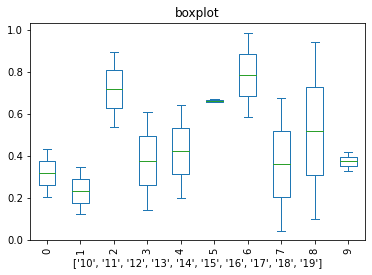

In [6]:
# put multiple boxplots in 1 plot:
# https://www.tutorialspoint.com/plot-multiple-boxplots-in-one-graph-in-pandas-or-matplotlib

%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Set the figure size
#plt.rcParams["figure.figsize"] = [7.50, 3.50]
#plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"Box1": np.random.rand(10), "Box2": np.random.rand(10)})
data_transposed = data.T 

# Plot the dataframe
#ax = data[['Box1', 'Box2']].plot(kind='box', title='boxplot')

nam=[]
for n in list(range(10, 20)):
    nam.append(str(n))

ax = data_transposed.plot(kind='box', rot=90, title='boxplot')
plt.xlabel(nam)

# Display the plot
plt.show()

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib qt

# initialize dataframe
n = 200
ngroup = 3
df = pd.DataFrame({'channel': map(np.floor, np.random.rand(n) * ngroup), 'std_val': np.random.rand(n)})

df.insert(loc=0, column='mag_n', value=df.index)

channel = 'mag_n'
std_lvl = 'std_val'
grouped = df.groupby(channel)

names, vals, xs = [], [] ,[]

for i, (name, subdf) in enumerate(grouped):
    names.append(name)
    vals.append(subdf[std_lvl].tolist())
    xs.append(np.random.normal(i+1, 0, subdf.shape[0])) #here is to create dots not in 1 line. awesome!


plt.boxplot(vals, labels=names)
ngroup = len(vals)

for x, val in zip(xs, vals):
    plt.scatter(x, val, alpha=0.4, color='r')




df


qt.qpa.drawing: Layer-backing can not be explicitly controlled on 10.14 when built against the 10.14 SDK


,mag_n,channel,std_val
0,0,0.0,0.475386
1,1,0.0,0.681219
2,2,0.0,0.265316
3,3,2.0,0.801202
4,4,1.0,0.699656
...,...,...,...
195,195,0.0,0.113392
196,196,1.0,0.550265
197,197,0.0,0.976348
198,198,2.0,0.558591


In [98]:
channels=102

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt

x = pd.DataFrame(np.random.randn(7, channels))
fig = plt.figure()
ax = plt.subplot(111)
for i in range(channels):
    ax.boxplot(x.iloc[:,i].values, positions = [i])
    sc = plt.scatter([i]*len(x.iloc[:,i].values), x.iloc[:,i].values, color=".25", s=3) 
  
#ax.set_xlim(-0.5, 9.5)
plt.show()
x

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,0.244102,0.643256,0.687000,0.497494,0.819093,-0.173042,-1.578911,0.348773,-0.076961,0.765138,...,-0.146197,-0.865779,-0.315159,-0.824259,-1.896223,-0.949278,1.460259,-1.333380,0.333201,0.490886
1,-0.785996,-0.408061,1.001028,0.273762,-1.332207,-0.254305,1.256212,-0.861471,-0.076241,0.039893,...,-0.550429,-0.970043,-0.881458,-0.965297,0.848452,0.445428,-0.255829,-0.151233,0.460337,0.453450
2,1.270332,0.182650,1.149605,-0.729148,1.485004,-0.809080,1.353177,-0.709330,0.596984,0.706729,...,0.178023,-1.176319,0.364756,-1.820242,0.282293,-0.502336,-0.473780,0.744872,-0.939230,0.586655
3,-1.721231,0.519141,-0.033930,-1.699579,0.877046,-0.163877,-0.698380,0.159139,0.599834,-1.626807,...,0.412426,-0.501785,-1.122915,1.254941,0.997810,-0.355736,0.105069,-1.491651,-0.493406,-1.217625
4,-1.547810,0.304804,-0.720855,0.154841,-1.235342,1.762922,0.038915,-1.728267,-0.001508,-1.429131,...,1.633692,-1.215661,-1.645762,-1.109067,1.706806,1.311349,0.158337,-0.390294,0.292692,-2.188472
5,1.688162,-0.150569,-0.494811,0.055886,0.257007,2.063610,0.021038,0.221447,0.946541,-0.672475,...,-0.823784,0.801012,0.416812,-1.886841,3.177179,-0.501890,2.215432,-0.519497,0.073378,0.586324
6,-1.322124,0.537978,-2.106715,0.097293,2.786441,-0.390159,0.692958,-0.494764,1.143266,-0.057520,...,-1.128212,-0.154228,0.470033,-0.711055,1.612777,-0.759869,0.829190,0.276045,-0.245354,1.453286


In [106]:
# Import libraries using import keyword
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

In [121]:
def add_plot_slider(plot, axis):

    # Choose the Slider color
    slider_color = 'White'
    
    # Set the axis and slider position in the plot
    axis_position = plt.axes([0.2, 0.1, 0.65, 0.03],
                            facecolor = slider_color)
    slider_object = Slider(axis_position,
                            'Pos', 0.1, 90.0)
    
    # update() function to change the graph when the
    # slider is in use
    def update_slider(pos):
        axis.axis([pos, pos+15, -1, 1])
        plot.canvas.draw_idle()

    slider_object.on_changed(update_slider)

    return slider_object
    

In [119]:

#Make slider in a plot: https://www.geeksforgeeks.org/python-scroll-through-plots/

%matplotlib qt
 
# Setting Plot and Axis variables as subplots()
# function returns tuple(fig, ax)
plot, axis = plt.subplots()
 
# Adjust the bottom size according to the
# requirement of the user
plt.subplots_adjust(bottom=0.25)
 
# Set the x and y axis to some dummy data
t = np.arange(0.0, 100.0, 0.1)
s = np.sin(2*np.pi*t)
 
# plot the x and y using plot function
plt.plot(t, s)

slider = add_plot_slider(plot, axis)

# Display the plot
plt.show()

In [128]:
def add_hovering_on_scatter(Plot, Axis, sc_boxes, dots_names):
    
    #Set   generic annotation:
    annot = Axis.annotate("", xy=(0,0), xytext=(5,20),textcoords="offset points",
                        bbox=dict(boxstyle="round", fc="w"),
                        arrowprops=dict(arrowstyle="->"))
    #xytext - how far from the dot the text is, bbox - box with name inside, arrowprops - to draw arrow

    annot.set_visible(False) #hide annotations first

    def update_annot(sc_box, ind):

        pos = sc_box.get_offsets()[ind["ind"][0]]
        annot.xy = pos #resets the xy values from annot above

        #text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
        #                       " ".join([ch_only_name_mag[n] for n in ind["ind"]]))
        #shows both index and name of channel

        text = "{}".format(" ".join([dots_names[n] for n in ind["ind"]]))
        annot.set_text(text) #resets the text from annot above
        

    def hover(event):
        vis = annot.get_visible()
        if event.inaxes == Axis:
            for sc_box in sc_boxes: #loop over each separat boxplot with scatter dots in it
                cont, ind = sc_box.contains(event)
                if cont: #if hovering takes place - set annotation to visible
                    update_annot(sc_box, ind)
                    annot.set_visible(True)  
                    Plot.canvas.draw_idle()
                else:
                    if vis:
                        annot.set_visible(False)
                        Plot.canvas.draw_idle()

    Plot.canvas.mpl_connect("motion_notify_event", hover)

    return(sc_boxes)

In [142]:
#Multiple boxplots with slider

# put multiple boxplots in 1 plot:
# https://www.tutorialspoint.com/plot-multiple-boxplots-in-one-graph-in-pandas-or-matplotlib

%matplotlib qt

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Plot, Axis = plt.subplots()

# Pandas dataframe
data = pd.DataFrame({"Box1": np.random.rand(100), "Box2": np.random.rand(100)})
data_transposed = data.T 

# Plot the dataframe
#ax = data[['Box1', 'Box2']].plot(kind='box', title='boxplot')

# nam=[]
# for n in list(range(10, 20)):
#     nam.append(str(n))

#bp = data_transposed.plot(kind='box', rot=90, title='boxplot')
bp = plt.boxplot(data_transposed)
sc_boxes=[]
for i in range(data_transposed.shape[1]):
    sc_x=[i+1]*len(data_transposed.iloc[:,i].values) #x axis values
    sc_y=data_transposed.iloc[:,i].values #y axis values
    sc_box = plt.scatter(sc_x, sc_y, color=".25", s=3) 
    sc_boxes.append(sc_box)

dots_names=list(str(x) for x in data) 
#names of columns in data frame collected to annotate dots

sc2=[sc_boxes[0]]
print(sc2)
sc_boxes=add_hovering_on_scatter(Plot, Axis, sc2, dots_names)

slider = add_plot_slider(Plot, Axis)


# Display the plot
plt.show()

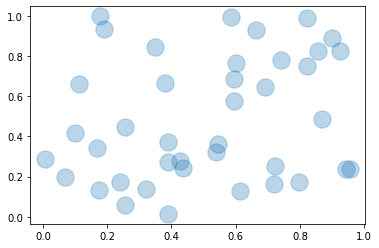

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import mpld3 

fig, ax = plt.subplots()
points = ax.scatter(np.random.rand(40), np.random.rand(40),
                    s=300, alpha=0.3)

labels = ["Point {0}".format(i) for i in range(40)]
tooltip = mpld3.plugins.PointLabelTooltip(points, labels)

mpld3.plugins.connect(fig, tooltip)
mpld3.save_html(fig, 'dots.html')

points